In [3]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib as mpl
# from matplotlib import rcParams
# rcParams['font.family'] = 'Malgun Gothic'
#plt.rc('font', family='NanumGothic')
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import scipy


In [4]:
print(mpl.matplotlib_fname())
print(mpl.__file__)

/usr/local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc
/usr/local/lib/python3.8/site-packages/matplotlib/__init__.py


In [5]:
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
["NanumGothic" in f]

[False]

In [7]:
tour_df = pd.read_excel('../DABA/숙소위치기반_교통_관광_통계정보의 사본.xlsx')

In [8]:
tour_df.info()
tour_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   이름                     1215 non-null   object 
 1   종류                     1215 non-null   object 
 2   평점                     1215 non-null   float64
 3   숙박가격                   1215 non-null   int64  
 4   도보시간                   1215 non-null   object 
 5   인기테그                   1215 non-null   object 
 6   별점 높은순 후기              1215 non-null   object 
 7   별점 낮은순 후기              1207 non-null   object 
 8   주소                     1215 non-null   object 
 9   객실수                    1197 non-null   object 
 10  총후기                    1215 non-null   int64  
 11  대실가격                   837 non-null    object 
 12  대실시간                   815 non-null    object 
 13  위도                     1215 non-null   float64
 14  경도                     1215 non-null   float64
 15  경쟁업소

Index(['이름', '종류', '평점', '숙박가격', '도보시간', '인기테그', '별점 높은순 후기', '별점 낮은순 후기',
       '주소', '객실수', '총후기', '대실가격', '대실시간', '위도', '경도', '경쟁업소_수(1km내)',
       '경쟁업소_최단거리(1km내)', '경쟁업소_최장거리(1km내)', '경쟁업소_평균거리(1km내)',
       '버스정류장_수(1km내)', '지하철역_수(1km내)', '버스정류장_최단거리(1km내)', '버스정류장_평균거리(1km내)',
       '지하철역_최단거리(1km내)', '지하철역_평균거리(1km내)', '교통유동인구_월평균승차수(1km내)',
       '교통유동인구_월평균하차수(1km내)', '교통유동인구_월평균승하차총계(1km내)', '관광지_수(1km내)',
       '쇼핑몰_수(1km내)', '관광지_최단거리(1km내)', '관광지_평균거리(1km내)', '쇼핑몰_최단거리(1km내)',
       '쇼핑몰_평균거리(1km내)'],
      dtype='object')

In [9]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

# sns.set(style='white', font_scale=1.6)
# iris = sns.load_dataset('iris')

# iris.info()
# g = sns.PairGrid(iris, aspect=1.4, diag_sharey=False)
# g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
# g.map_diag(sns.distplot, kde_kws={'color': 'black'})
# g.map_upper(corrdot)

In [10]:
# select = ['평점', '객실수', '대실가격', '대실시간', '경쟁업소_수(1km내)',
#        '경쟁업소_최단거리(1km내)', '경쟁업소_최장거리(1km내)', '경쟁업소_평균거리(1km내)',
#        '버스정류장_수(1km내)', '지하철역_수(1km내)', '버스정류장_최단거리(1km내)', '버스정류장_평균거리(1km내)',
#        '지하철역_최단거리(1km내)', '지하철역_평균거리(1km내)', '교통유동인구_월평균승차수(1km내)',
#        '교통유동인구_월평균하차수(1km내)', '교통유동인구_월평균승하차총계(1km내)', '관광지_수(1km내)',
#        '쇼핑몰_수(1km내)', '관광지_최단거리(1km내)', '관광지_평균거리(1km내)', '쇼핑몰_최단거리(1km내)',
#        '쇼핑몰_평균거리(1km내)']
select = ['평점', '숙박가격',
       '객실수', '총후기', '경쟁업소_수(1km내)',
       '경쟁업소_최단거리(1km내)', '경쟁업소_최장거리(1km내)', '경쟁업소_평균거리(1km내)',
       '버스정류장_수(1km내)', '지하철역_수(1km내)', '버스정류장_최단거리(1km내)', '버스정류장_평균거리(1km내)',
       '지하철역_최단거리(1km내)', '지하철역_평균거리(1km내)', '교통유동인구_월평균승차수(1km내)',
       '교통유동인구_월평균하차수(1km내)', '교통유동인구_월평균승하차총계(1km내)', '관광지_수(1km내)',
       '쇼핑몰_수(1km내)', '관광지_최단거리(1km내)', '관광지_평균거리(1km내)', '쇼핑몰_최단거리(1km내)',
       '쇼핑몰_평균거리(1km내)']
#select = ['평점', '경쟁업소_수(1km내)', '지하철역_수(1km내)', '교통유동인구_월평균승하차총계(1km내)','관광지_수(1km내)','쇼핑몰_수(1km내)' ]
tour_df_select = tour_df[select]
tour_df_select

,평점,숙박가격,객실수,총후기,경쟁업소_수(1km내),경쟁업소_최단거리(1km내),경쟁업소_최장거리(1km내),경쟁업소_평균거리(1km내),버스정류장_수(1km내),지하철역_수(1km내),...,지하철역_평균거리(1km내),교통유동인구_월평균승차수(1km내),교통유동인구_월평균하차수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내),관광지_최단거리(1km내),관광지_평균거리(1km내),쇼핑몰_최단거리(1km내),쇼핑몰_평균거리(1km내)
0,4.8,250000,269,169,48,0.28,0.99,0.66,58,9,...,0.72,65461.18,66068.77,131529.95,6,6,0.61,0.82,0.57,0.79
1,4.7,200640,319,4416,8,0.43,0.83,0.60,45,3,...,0.62,41877.82,44699.42,86577.24,9,2,0.19,0.63,0.75,0.87
2,4.8,143000,378,7717,5,0.14,0.88,0.38,134,7,...,0.42,20412.48,20203.94,40616.42,3,3,0.70,0.79,0.18,0.23
3,4.3,265000,한국어,77,10,0.04,0.55,0.16,54,2,...,0.12,50042.49,51264.60,101307.08,9,3,0.16,0.71,0.49,0.81
4,4.7,158000,274,36,10,0.41,0.97,0.64,58,3,...,0.53,23108.84,23304.33,46413.18,15,7,0.13,0.50,0.14,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,4.8,60000,NaN,4,89,0.02,1.00,0.42,103,8,...,0.55,79574.44,78905.40,158479.84,14,3,0.22,0.66,0.38,0.62
1211,3.6,57000,NaN,13,61,0.04,0.99,0.65,145,6,...,0.58,40123.87,40226.95,80350.82,24,8,0.04,0.58,0.28,0.48
1212,4.0,108000,NaN,3,8,0.16,0.43,0.26,77,1,...,0.31,7937.43,7486.39,15423.81,2,2,0.26,0.45,0.09,0.43
1213,5.0,90000,NaN,1,78,0.00,0.96,0.64,97,7,...,0.66,75400.56,73681.34,149081.91,23,4,0.09,0.60,0.09,0.70


In [12]:
tour_df_select.replace({'객실수':'한국어'},pd.NA,inplace=True)
tour_df_select.replace({'객실수':'무료 와이파이수화물 보관 서비스'},pd.NA,inplace=True)
tour_df_select.replace({'객실수':'모닝콜 서비스24시간 리셉션'},pd.NA,inplace=True)
tour_df_select_dropna = tour_df_select.dropna()
tour_df_select_dropna
#tour_df_select_dropna.to_csv('../DAOU/find_muryo.csv', encoding='euc-kr')

/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_3816/3443340039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tour_df_select.replace({'객실수':'한국어'},pd.NA,inplace=True)
/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_3816/3443340039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tour_df_select.replace({'객실수':'무료 와이파이수화물 보관 서비스'},pd.NA,inplace=True)
/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_3816/3443340039.py:3: SettingWithCopyWarning: 
A value is trying to be 

,평점,숙박가격,객실수,총후기,경쟁업소_수(1km내),경쟁업소_최단거리(1km내),경쟁업소_최장거리(1km내),경쟁업소_평균거리(1km내),버스정류장_수(1km내),지하철역_수(1km내),...,지하철역_평균거리(1km내),교통유동인구_월평균승차수(1km내),교통유동인구_월평균하차수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내),관광지_최단거리(1km내),관광지_평균거리(1km내),쇼핑몰_최단거리(1km내),쇼핑몰_평균거리(1km내)
0,4.8,250000,269,169,48,0.28,0.99,0.66,58,9,...,0.72,65461.18,66068.77,131529.95,6,6,0.61,0.82,0.57,0.79
1,4.7,200640,319,4416,8,0.43,0.83,0.60,45,3,...,0.62,41877.82,44699.42,86577.24,9,2,0.19,0.63,0.75,0.87
2,4.8,143000,378,7717,5,0.14,0.88,0.38,134,7,...,0.42,20412.48,20203.94,40616.42,3,3,0.70,0.79,0.18,0.23
4,4.7,158000,274,36,10,0.41,0.97,0.64,58,3,...,0.53,23108.84,23304.33,46413.18,15,7,0.13,0.50,0.14,0.43
5,4.6,187000,282,3645,12,0.03,1.00,0.63,61,3,...,0.56,56439.25,57304.34,113743.59,10,4,0.20,0.56,0.31,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,4.2,40000,23,399,1,0.16,0.16,0.16,65,2,...,0.46,17058.58,16571.76,33630.34,8,5,0.28,0.57,0.19,0.47
1193,3.8,50000,33,98,4,0.54,0.76,0.66,112,3,...,0.48,12863.16,13262.60,26125.75,5,2,0.41,0.70,0.15,0.18
1194,4.4,40000,19,1781,5,0.30,0.95,0.57,91,1,...,0.34,6804.72,6598.34,13403.06,9,5,0.31,0.52,0.20,0.54
1195,4.0,40000,17,96,4,0.39,0.88,0.66,88,2,...,0.68,6023.02,6192.26,12215.28,10,3,0.16,0.63,0.32,0.51


In [13]:
cor_matrix = tour_df_select_dropna.corr()

<Axes: >

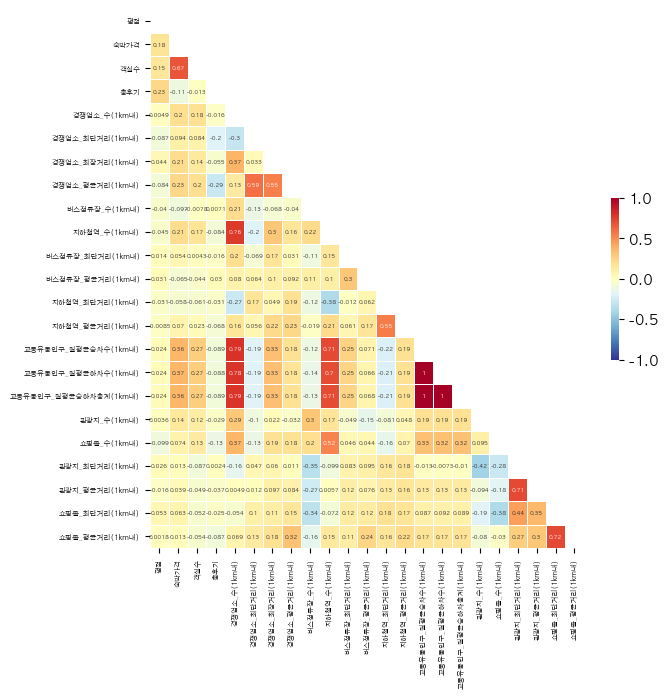

In [14]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)


# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(cor_matrix, bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(cor_matrix, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .3},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1
            annot_kws={"size": 4}
           )  
#plt.show()


In [15]:
select2 = ['평점', '숙박가격', '객실수', '총후기']
select_ori = ['평점', '경쟁업소_수(1km내)', '지하철역_수(1km내)', '교통유동인구_월평균승하차총계(1km내)','관광지_수(1km내)','쇼핑몰_수(1km내)' ]
#select2 = ['평점', '경쟁업소_수(1km내)', '지하철역_수(1km내)', '교통유동인구_월평균승하차총계(1km내)','관광지_수(1km내)','쇼핑몰_수(1km내)' ]
tour_df_select_dropna2 = tour_df_select_dropna[select_ori]
tour_df_select_dropna2['객실수'] = tour_df_select_dropna2['객실수'].astype(float)
tour_df_select_dropna2.info()


KeyError: '객실수'

In [2]:
#fig, ax = plt.subplots( figsize=(7,7) )


sns.set(style='white', font_scale=1.6,
        font="AppleGothic", 
        rc={"axes.unicode_minus":False})
g = sns.PairGrid(tour_df_select_dropna2, aspect=1.4, diag_sharey=False)
#g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
#ax.axhline(y=100)
g.map_lower(sns.regplot, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

NameError: name 'sns' is not defined